# Logistic Regression
Linear regression is a statistical technique that models the probability of events, given one or more independant variables. It is mainly used for binary classification tasks

Unlike in linear regression, where the hypothetical function `y= wx + b` help with calculating unbound values, here we need to find either 0 or 1 (True and False)

So the logistic regression model is as follows,

$$
y = sigmoid( wx + b )
$$

sigmoid is an activation function that is defined as,

$$
sigmoid(z) = \frac{1}{1 + e^-z}
$$

Where `e` is the euler number which is equal 2.71828 and `z` is the dependant variable 

## Cost Function (loss)

The cost function used for a logistic regression method is a convex function, whereas the least squared error method used in linear regression is non convex (refer to Notes for more details). A common function used for logistic regression is Binary Cross Entropy

$$
BCE = -\frac{1}{m} \sum_{i=1}^{m} ylog(\hat{y}) + (1-y)log(1-\hat{y})
$$

where $\hat{y}$ is the predicted value from the logistic regression equation

## Calculating Gradient partials 

For weights ($x_i^T$ is the transposed x value at ith position),

$$
\frac{\partial BCE}{\partial w_j} = \frac{1}{m} (\hat{y}_i - y_i) x_i^T
$$

For bias,
$$
\frac{\partial BCE}{\partial b} = \frac{1}{m} (\hat{y}_i - y_i)
$$


The partials can then be used in the general gradient descent calculations

### Implementation
The implementation would involve a cost_function() for BCE, compute_gradients() for the partials, grad_desc() and a pred() for predictions and fitting

In [2]:
import numpy as np
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### Data generation and visualization

In [3]:
np.random.seed(123)   
bc = ds.load_breast_cancer() # 569 samples, 2 target classes, 30 features, can be found at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
X, y = bc.data, bc.target
print(len(bc.feature_names))
# Normalize features (important for stability)
X = (X - X.mean(axis=0)) / X.std(axis=0) # subtract the mean of each feature which centers data around 0, which is then divided by standard deviation of the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


30


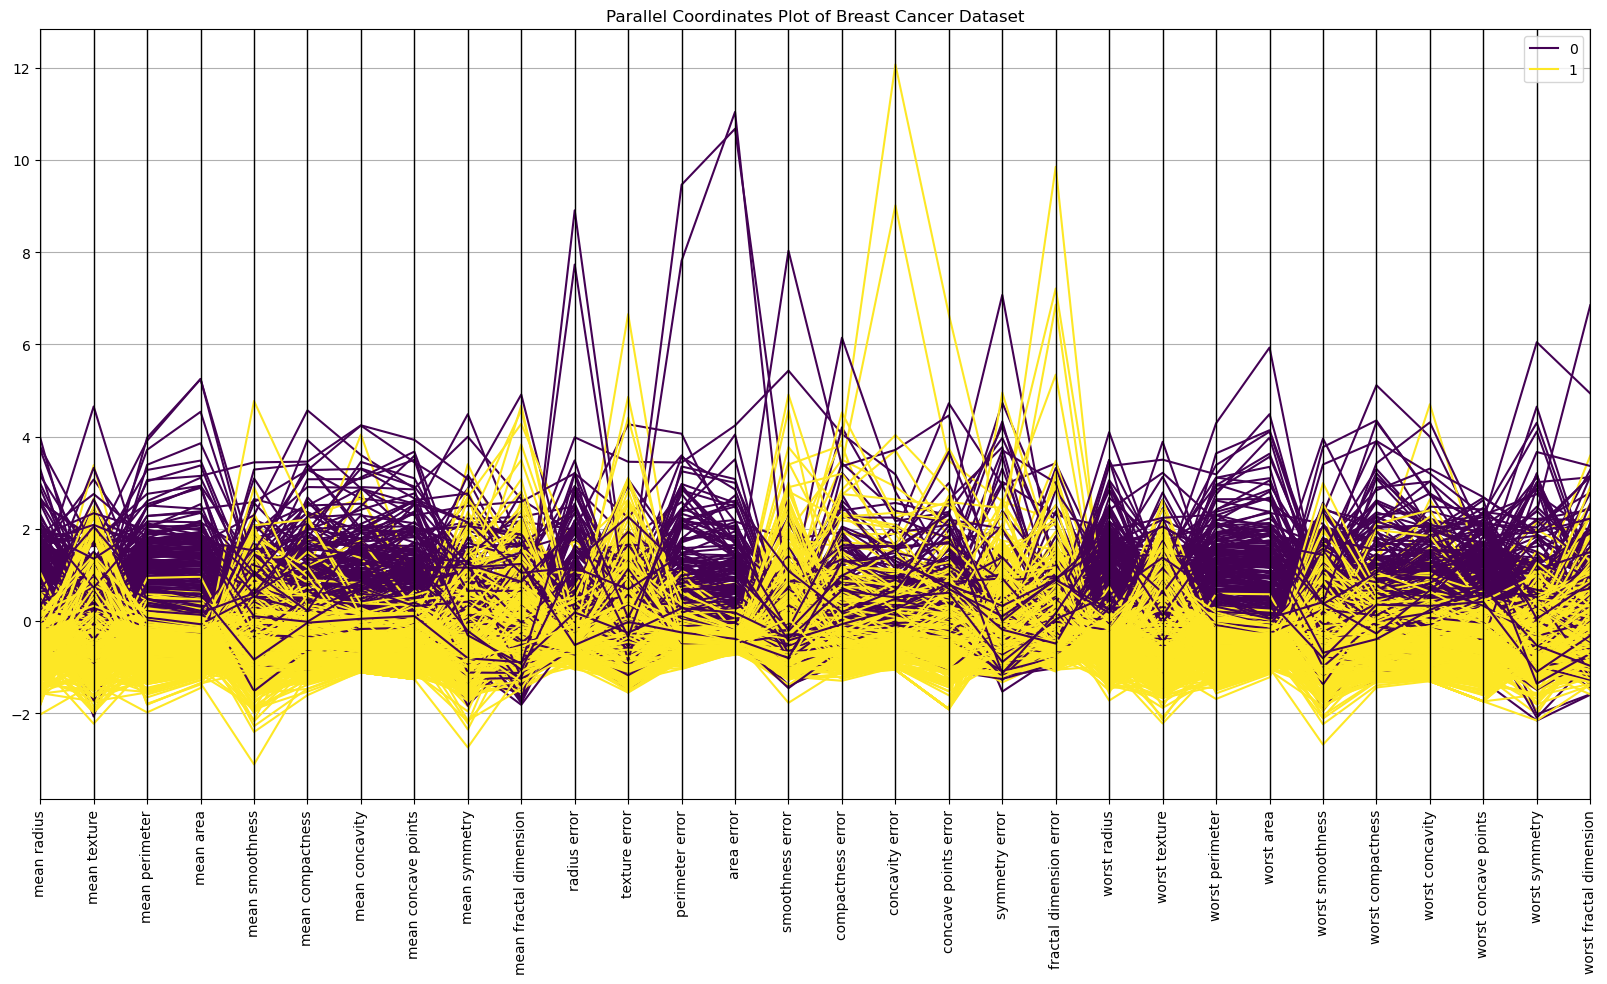

In [22]:
from pandas.plotting import parallel_coordinates
import pandas as pd

df = pd.DataFrame(X, columns=bc.feature_names)
df['target'] = y

plt.figure(figsize=(20,10))
parallel_coordinates(df,'target', colormap='viridis')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Parallel Coordinates Plot of Breast Cancer Dataset')
plt.show()

### Model dev and training

In [ ]:
class logisticRegression:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def cost_function(self, y, y_pred):
        epsilon = 1e-9 # the reason to add epsilon is to prevent any crashes when log(0) which can be inf
        m = len(y)
        y1 = y * np.log(y_pred + epsilon)
        y2 = (1-y) * np.log(1-y_pred+epsilon)
        return -np.sum(y1 + y2)/m
    
    def compute_partials(self, X, y, y_pred):
         error = y_pred - y
         m = len(y)
         dW = (1/m) * np.dot(X.T, error)
         dB = (1/m) * np.sum(error)

         return dW, dB
    
    def train(self, X, y): # basically gradient descent
        loss_func = []
        m, n = X.shape
        
        # Initialize weights properly
        self.weights = np.zeros(n)
        self.bias = 0
        for epoch in range(self.epochs):
            y_hat = np.dot(X, self.weights) + self.bias # get y_pred
            y_pred = self.sigmoid(y_hat)
            loss = self.cost_function(y, y_pred) # get cost
            loss_func.append(loss)
            dW, dB = self.compute_partials(X, y, y_pred)  # compute partials

             # use partials to update weights and biases
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * dB

            if epoch%2==0:
                print(f"Epoch {epoch}/{self.epochs}, Loss: {loss}")
        return self.weights, self.bias, loss_func
    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(y_hat)
        y_pred_out = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_out)

In [43]:
model = logisticRegression(2,1000)
weights, bias, loss1 = model.train(X_train,y_train)

Epoch 0/1000, Loss: 0.6931471785599452
Epoch 2/1000, Loss: 0.11384591565970854
Epoch 4/1000, Loss: 0.07993680396059742
Epoch 6/1000, Loss: 0.07405981595668513
Epoch 8/1000, Loss: 0.07085538458532985
Epoch 10/1000, Loss: 0.06863247610474463
Epoch 12/1000, Loss: 0.06691433385409429
Epoch 14/1000, Loss: 0.06550689746752446
Epoch 16/1000, Loss: 0.06430991081082592
Epoch 18/1000, Loss: 0.06326455787382505
Epoch 20/1000, Loss: 0.062333721547906284
Epoch 22/1000, Loss: 0.061492732746556894
Epoch 24/1000, Loss: 0.06072447463172527
Epoch 26/1000, Loss: 0.060016610890586096
Epoch 28/1000, Loss: 0.059359945535594025
Epoch 30/1000, Loss: 0.05874741731244047
Epoch 32/1000, Loss: 0.05817346310482781
Epoch 34/1000, Loss: 0.05763360248985675
Epoch 36/1000, Loss: 0.05712415861929146
Epoch 38/1000, Loss: 0.0566420654559154
Epoch 40/1000, Loss: 0.05618473117792751
Epoch 42/1000, Loss: 0.0557499390606256
Epoch 44/1000, Loss: 0.05533577397845433
Epoch 46/1000, Loss: 0.05494056682525315
Epoch 48/1000, Loss:

### Loss function chart

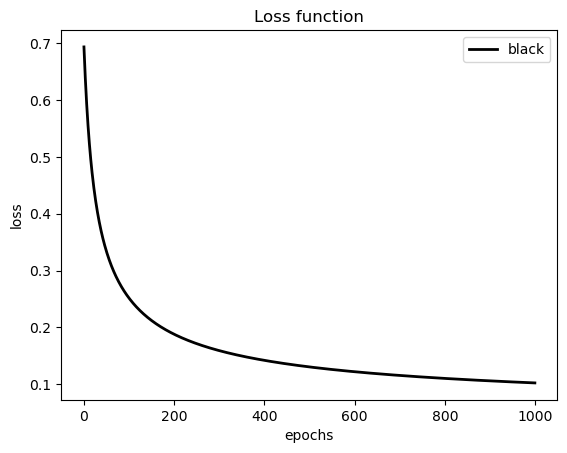

In [39]:
plt.plot(loss1,linewidth=2,color='black', label='black')
plt.title('Loss function')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Prediction accuracy on test data

In [44]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9912280701754386


### Note
**Why use a different loss function from linear regression?**

If you try to use the linear regression's cost function in a logistic regression problem, you would end up with a non-convex function: a wierdly-shaped graph with no easy to find minimum global point. 

This strange outcome is due to the fact that in logistic regression we have the sigmoid function around, which is non-linear (i.e. not a line). The gradient descent algorithm might get stuck in a local minimum point. That's why we still need a neat convex function as we did for linear regression: a bowl-shaped function that eases the gradient descent function's work to converge to the optimal minimum point.

*Source can be found [here](https://www.internalpointers.com/post/cost-function-logistic-regression)*